In [1]:
# import required libraries

import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dir_path = "/content/drive/MyDrive/Colab"
file_path = dir_path + "/food-images.zip"
!unzip $file_path

In [3]:
# create dataset from directory containing sample images
# directory is structured as class1/ class2/ ..
# each containing sample images for that class

train_data, valid_data = keras.utils.image_dataset_from_directory(
    "food-images",
    labels = "inferred",
    class_names=('burger', 'cake', 'juice', 'noodles', 'pizza'),
    image_size=(224,224),
    batch_size=32,
    validation_split=0.2,
    subset="both",
    seed=1337)

Found 1479 files belonging to 5 classes.
Using 1184 files for training.
Using 295 files for validation.


In [4]:
num_classes = 5
class_labels = ['burger', 'cake', 'juice', 'noodles', 'pizza']

In [24]:
# build basic CNN model

from keras import layers

model = keras.Sequential([
    keras.Input(shape=(224,224,3)),
    layers.Conv2D(32, 3, activation='relu', name='layer1'),
    layers.Conv2D(32, 3, activation='relu', name='layer2'),
    layers.MaxPooling2D(3, name='layer3'),

    layers.Conv2D(32, 3, activation='relu', name='layer4'),
    layers.Conv2D(32, 3, activation='relu', name='layer5'),
    layers.MaxPooling2D(3, name='layer6'),

    layers.GlobalMaxPooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 189s 5s/step - loss: 12.5035 - val_loss: 1.7345
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 185s 5s/step - loss: 1.6581 - val_loss: 1.4930
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - loss: 1.3693 - val_loss: 1.4029
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 187s 5s/step - loss: 1.2572 - val_loss: 1.2254
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 195s 5s/step - loss: 1.0572 - val_loss: 1.1631


In [26]:
# load test images

test_sample = []

for k in range(25):
  img_file = str(k+1) + ".jpg"
  test_img = keras.utils.load_img(img_file, target_size=(224,224))
  test_sample.append(test_img)

np.array(test_sample).shape

(25, 224, 224, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step


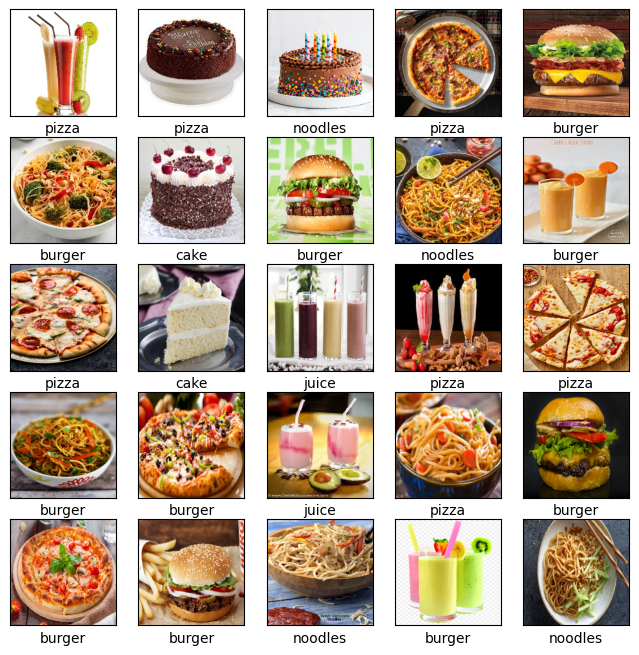

In [27]:
# run model predictions
y = model.predict(np.array(test_sample))

# plot model output on test images

plt.figure(figsize=(8,8))

for k in range(25):
  plt.subplot(5, 5, k+1)
  plt.imshow(test_sample[k])

  label = class_labels[np.argmax(y[k])]
  plt.xlabel(label)
  plt.xticks([])
  plt.yticks([])